## read data & data preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_excel("data_for_classification.xlsx")
df.head()

,مرجعية,تحليل,تصميم,برمجة,اختبار,نتائج,تقرير,عرض,غيتهاب
0,"[43, 31, 39, 46, 42, 42, 25, 37, 38, 24]","[43, 23, 27, 23, 28, 38, 11, 30, 42, 33]","[29, 13, 42, 39, 49, 43, 27, 40, 19, 30]","[48, 29, 28, 45, 11, 16, 13, 14, 16, 18]","[11, 28, 20, 10, 15, 25, 34, 32, 37, 35]","[19, 50, 37, 33, 23, 49, 22, 29, 25, 34]","[34, 43, 20, 45, 30, 29, 23, 31, 12, 38]","[30, 13, 19, 29, 15, 34, 12, 22, 28, 26]","[21, 16, 41, 16, 34, 49, 24, 51, 51, 17]"
1,"[24, 19, 18, 33, 51, 35, 27, 49, 47, 29, 50, 2...","[50, 20, 27, 42, 44, 30, 39, 23, 39, 19, 33, 4...","[48, 12, 12, 26, 34, 35, 22, 15, 36, 14, 51, 2...","[21, 38, 49, 37, 51, 12, 10, 20, 43, 11, 19, 2...","[16, 16, 43, 30, 10, 22, 41, 36, 13, 34, 32, 4...","[34, 11, 14, 26, 29, 26, 19, 33, 36, 27, 51, 4...","[22, 49, 31, 16, 18, 48, 11, 38, 24, 49, 40, 1...","[42, 13, 45, 39, 25, 10, 27, 18, 27, 44, 11, 3...","[26, 16, 51, 40, 14, 38, 11, 42, 23, 17, 44, 2..."
2,"[41, 34, 37, 10, 12, 10, 18, 27, 19, 21]","[20, 12, 47, 27, 50, 25, 35, 24, 48, 10]","[43, 22, 40, 33, 45, 50, 18, 11, 49, 23]","[18, 27, 29, 24, 10, 22, 47, 40, 23, 31]","[10, 10, 41, 26, 34, 34, 35, 15, 22, 37]","[19, 19, 21, 26, 26, 27, 45, 45, 35, 29]","[18, 12, 30, 28, 46, 17, 23, 50, 45, 24]","[23, 21, 22, 34, 10, 38, 42, 37, 39, 21]","[49, 29, 48, 31, 45, 29, 15, 28, 49, 18]"
3,"[42, 35, 37, 34, 51, 43, 30, 27, 35, 48, 39, 3...","[35, 16, 38, 19, 28, 45, 37, 50, 37, 33, 40, 5...","[16, 16, 49, 21, 26, 37, 18, 26, 29, 21, 32, 3...","[12, 32, 46, 26, 19, 17, 20, 25, 19, 41, 11, 2...","[10, 48, 24, 33, 47, 46, 24, 45, 44, 14, 36, 3...","[19, 48, 34, 17, 28, 29, 18, 46, 29, 15, 22, 3...","[33, 41, 44, 12, 34, 10, 17, 51, 36, 41, 36, 3...","[35, 50, 38, 27, 19, 25, 14, 47, 40, 40, 50, 4...","[14, 25, 36, 44, 32, 50, 14, 31, 21, 41, 17, 3..."
4,"[48, 47, 32, 45, 31]","[23, 11, 51, 37, 14]","[27, 32, 13, 34, 19]","[27, 12, 36, 24, 28]","[38, 30, 36, 13, 32]","[18, 15, 22, 48, 48]","[18, 23, 39, 16, 20]","[22, 14, 48, 15, 16]","[36, 19, 27, 43, 38]"


In [3]:
for i in df.columns:
    df[i] = df[i].apply(eval)

In [4]:
print(df.dtypes)

مرجعية    object
تحليل     object
تصميم     object
برمجة     object
اختبار    object
نتائج     object
تقرير     object
عرض       object
غيتهاب    object
dtype: object


In [5]:
for row_index in range(len(df)):
    for col_index in range(len(df.columns)):
        value = df.iloc[row_index, col_index]
        weights = [0.01 * i for i in range(1,len(value)+1)]
        result = [x * y for x, y in zip(value, weights)]
        sum_weight = 0
        for i in range(len(weights)):
            if value[i] != 0:
                sum_weight += weights[i]
        if sum_weight != 0:
            df.iloc[row_index, col_index] = np.ceil(sum(result)/sum_weight)
        else:
            df.iloc[row_index, col_index] = 0
df.head()


,مرجعية,تحليل,تصميم,برمجة,اختبار,نتائج,تقرير,عرض,غيتهاب
0,35.0,31.0,34.0,20.0,29.0,32.0,29.0,24.0,35.0
1,34.0,37.0,34.0,29.0,33.0,34.0,33.0,26.0,32.0
2,21.0,31.0,32.0,30.0,29.0,33.0,33.0,31.0,32.0
3,33.0,36.0,27.0,24.0,29.0,29.0,28.0,33.0,30.0
4,39.0,28.0,25.0,27.0,28.0,37.0,23.0,23.0,35.0


In [6]:
df["متوسط"]=0
weights = [0.5, 0.7, 0.8, 0.9, 0.3, 1, 0.4, 0.2, 0.2 ,0]

for i in range(len(df)):
    value = df.iloc[i].tolist()
    result = [x * y for x, y in zip(value, weights)]
    sum_weight = 0
    for j in range(len(weights)):
        if value[j] != 0:
            sum_weight += weights[j]
    if sum_weight != 0:
        df.loc[i,"متوسط"] = np.ceil(sum(result)/sum_weight)
    else:
        df.loc[i,"متوسط"] = 0

df.head()

,مرجعية,تحليل,تصميم,برمجة,اختبار,نتائج,تقرير,عرض,غيتهاب,متوسط
0,35.0,31.0,34.0,20.0,29.0,32.0,29.0,24.0,35.0,30
1,34.0,37.0,34.0,29.0,33.0,34.0,33.0,26.0,32.0,33
2,21.0,31.0,32.0,30.0,29.0,33.0,33.0,31.0,32.0,31
3,33.0,36.0,27.0,24.0,29.0,29.0,28.0,33.0,30.0,30
4,39.0,28.0,25.0,27.0,28.0,37.0,23.0,23.0,35.0,30


In [7]:
df = df.apply(lambda x: x.astype(int))
print(df.dtypes)

مرجعية    int32
تحليل     int32
تصميم     int32
برمجة     int32
اختبار    int32
نتائج     int32
تقرير     int32
عرض       int32
غيتهاب    int32
متوسط     int32
dtype: object


In [8]:
df['تصنيف']=1
for i in range(df['تصنيف'].count()):
    if df.iloc[i,9]<50:
        df.iloc[i,10]="أحمر"
    elif (df.iloc[i,9] >=50) & (df.iloc[i,9]<70):
        df.iloc[i,10]="برتقالي"
    elif (df.iloc[i,9] >=70) :
        df.iloc[i,10]="أخضر"

df.head()

,مرجعية,تحليل,تصميم,برمجة,اختبار,نتائج,تقرير,عرض,غيتهاب,متوسط,تصنيف
0,35,31,34,20,29,32,29,24,35,30,أحمر
1,34,37,34,29,33,34,33,26,32,33,أحمر
2,21,31,32,30,29,33,33,31,32,31,أحمر
3,33,36,27,24,29,29,28,33,30,30,أحمر
4,39,28,25,27,28,37,23,23,35,30,أحمر


In [9]:
df.describe()

,مرجعية,تحليل,تصميم,برمجة,اختبار,نتائج,تقرير,عرض,غيتهاب,متوسط
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,56.924400,56.904400,57.144800,57.029200,57.140400,56.882800,56.941200,56.962000,56.928400,57.472400
std,20.692558,20.778546,20.628069,20.674509,20.764016,20.806129,20.800029,20.735644,20.815547,19.989224
min,18.000000,20.000000,16.000000,18.000000,14.000000,17.000000,17.000000,15.000000,16.000000,27.000000
25%,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,34.000000
50%,55.000000,55.000000,56.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,56.000000
75%,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,84.000000
max,98.000000,95.000000,96.000000,96.000000,98.000000,96.000000,97.000000,98.000000,97.000000,90.000000


In [10]:
print("\nnumber of samples : " , df.count().max())
print(df.columns)


number of samples :  2500
Index(['مرجعية', 'تحليل', 'تصميم', 'برمجة', 'اختبار', 'نتائج', 'تقرير', 'عرض',
       'غيتهاب', 'متوسط', 'تصنيف'],
      dtype='object')


### Duplicate check

In [11]:
print("number of duplicate row: ",df.duplicated().sum())

number of duplicate row:  0


### data embalance check

In [12]:
print("The number of samples in the class 'red' : " , df['تصنيف'][df['تصنيف'] == "أحمر"].count())
print("The number of samples in the class 'orange' : " , df['تصنيف'][df['تصنيف'] == "برتقالي"].count())
print("The number of samples in the class 'green' : " , df['تصنيف'][df['تصنيف'] == "أخضر"].count())

import plotly.express as px

colors = {"red":df['تصنيف'][df['تصنيف'] == "أحمر"].count(), "orange":df['تصنيف'][df['تصنيف'] == "برتقالي"].count(), "green":df['تصنيف'][df['تصنيف'] == "أخضر"].count()}
sorted_colors = dict(sorted(colors.items(), key=lambda x: x[1], reverse=True))

fig = px.pie(values=list(sorted_colors.values()), names=list(sorted_colors.keys()), width=700, height=400, color_discrete_sequence=list(sorted_colors.keys()), title="Marks distribute")

fig.show()

The number of samples in the class 'red' :  669
The number of samples in the class 'orange' :  1181
The number of samples in the class 'green' :  650


### checking for outliers

In [13]:
numerical_columns = list(df.loc[:,['متوسط']])

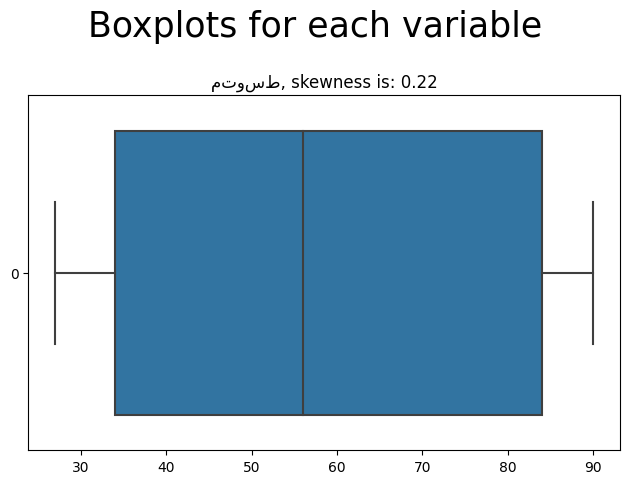

In [14]:
# checking boxplots
fig, axs = plt.subplots(1, 1, sharey=True)
fig.suptitle('Boxplots for each variable', y=1, size=25)

for i, data in enumerate(numerical_columns):
    sns.boxplot(data=df[data], orient='h', ax=axs)
    axs.set_title(data + ', skewness is: ' + str(round(df[data].skew(axis=0, skipna=True), 2)))

plt.tight_layout()

In [15]:
from collections import Counter
def IQR_method (df,n,features):
    """
    Takes a dataframe and returns an index list corresponding to the observations 
    containing more than n outliers according to the Tukey IQR method.
    """
    outlier_list = []
    
    for column in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[column], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[column],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # outlier step
        outlier_step = 1.5 * IQR
        # Determining a list of indices of outliers
        outlier_list_column = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step )].index
        # appending the list of outliers 
        outlier_list.extend(outlier_list_column)
         # selecting observations containing more than x outliers
        outlier_list = Counter(outlier_list)        
        multiple_outliers = list( k for k, v in outlier_list.items() if v > n )
        
        # Calculate the number of records below and above lower and above bound value respectively
        out1 = df[df[column] < Q1 - outlier_step]
        out2 = df[df[column] > Q3 + outlier_step]
        
        print('Total number of deleted outliers is:', out1.shape[0]+out2.shape[0])
        return multiple_outliers

In [16]:
# detecting outliers
Outliers_IQR = IQR_method(df,1,numerical_columns)

# dropping outliers
df = df.drop(Outliers_IQR, axis = 0).reset_index(drop=True)

Total number of deleted outliers is: 0


In [17]:
df.shape

(2500, 11)

### imputaion  missing

In [18]:
df.isna().sum()

مرجعية    0
تحليل     0
تصميم     0
برمجة     0
اختبار    0
نتائج     0
تقرير     0
عرض       0
غيتهاب    0
متوسط     0
تصنيف     0
dtype: int64

### data_split

In [19]:
from sklearn.model_selection import train_test_split

df=df.drop(['متوسط'],axis=1)

x=df.drop(['تصنيف'],axis=1)
y=df['تصنيف']

x_train ,x_test ,y_train ,y_test = train_test_split(x,y, test_size=0.3,shuffle=True, random_state=42)
x_train, x_test = x_train.reset_index(drop=True), x_test.reset_index(drop=True)
y_train, y_test = y_train.reset_index(drop=True), y_test.reset_index(drop=True)

## building and evaluation models

### import libraris

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import confusion_matrix ,recall_score, precision_score, f1_score, accuracy_score, classification_report
from yellowbrick.classifier import ROCAUC

##############################################################################################

kfold = KFold(n_splits=10, shuffle=True, random_state=42)

##############################################################################################

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

##############################################################################################

### confusion matrix

In [21]:
def confusion_matrix_plot(cm):
    classes = ['class 1', 'class 2' , 'class 3' ]
    with np.errstate(divide='ignore', invalid='ignore'):
        cm = cm/np.sum(cm,axis=0)
    tick_marks = np.arange(3)
    fig, ax = plt.subplots(figsize=(10,10))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Dark2)
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            text = ax.text(j, i, np.around(cm[i, j],decimals=2),
                        ha="center", va="center", color="w")
    plt.title('Normalized confusion matrix for model')
    fig.colorbar(im)
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes);

### sensitivy and specifity

In [22]:
def sensitivity_specificity(cm):
    sensitivity = []
    specificity = []

    for i in range(len(cm)):
        true_positive = cm[i, i]
        false_positive = cm[:, i].sum() - true_positive
        false_negative = cm[i, :].sum() - true_positive
        true_negative = cm.sum() - (true_positive + false_positive + false_negative)

        sensitivity.append(true_positive / (true_positive + false_negative))
        specificity.append(true_negative / (true_negative + false_positive))

    print("Sensitivity for each class:", sensitivity)
    print("Specificity for each class:", specificity)
    for i in range(len(sensitivity)):
        print("Sensitivity for each class: ",i," is", sensitivity[i])
        print("Specificity for each class:",i," is", specificity[i])

### AUC (ROC PLOT)

In [23]:
def plot_ROC_curve(model, x_train, y_train, x_test, y_test):

    # Creating visualization with the readable labels
    visualizer = ROCAUC(model, encoder={"أحمر": 'أحمر', 
                                        "برتقالي": 'برتقالي', 
                                        "أخضر": 'أخضر',
})
                                        
    # Fitting to the training data first then scoring with the test data                                    
    visualizer.fit(x_train, y_train)
    visualizer.score(x_test, y_test)
    visualizer.show()
    
    return visualizer

### plot table score

In [24]:
def table_score(ypred):
    Recall = recall_score(y_test, ypred, average='macro' , zero_division=1)
    Precision = precision_score(y_test, ypred, average='macro' , zero_division=1)
    f1 = f1_score(y_test, ypred, average='macro' , zero_division=1)
    accuracy = accuracy_score(y_test, ypred)
    ndf = [(Recall, Precision, f1, accuracy)]

    score = pd.DataFrame(data=ndf, columns=['Recall', 'Precision', 'F1 Score', 'Accuracy'])
    return score

### KNN model

In [25]:
knn1 = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
knn1.fit(x_train , y_train)
print("Test score: {:.2f}".format(knn1.score(x_test , y_test)))

Test score: 0.99


In [26]:
param_grid_knn = {
    'n_neighbors': [1, 10 , 100], 
    'weights': ['uniform', 'distance'], 
    'metric': ['euclidean' , 'cosine' , 'manhattan' , 'minkowski']
}
clf_knn = GridSearchCV(estimator= KNeighborsClassifier(), param_grid= param_grid_knn , cv=kfold, scoring='accuracy', verbose=3)
clf_knn.fit(x_train, y_train)

Fitting 10 folds for each of 24 candidates, totalling 240 fits
[CV 1/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.994 total time=   0.0s
[CV 2/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.977 total time=   0.0s
[CV 3/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.994 total time=   0.0s
[CV 4/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.994 total time=   0.0s
[CV 5/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 6/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.989 total time=   0.0s
[CV 7/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.989 total time=   0.0s
[CV 8/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.994 total time=   0.0s
[CV 9/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 10/10] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'cosine', 'manhattan',
                                    'minkowski'],
                         'n_neighbors': [1, 10, 100],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [27]:
print("Best of Hyper Parameter :" , clf_knn.best_params_, "\nScore : " , clf_knn.best_score_)

Best of Hyper Parameter : {'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'} 
Score :  0.9925714285714285


In [28]:
knn2 = clf_knn.best_estimator_.fit(x_train,y_train)
print("Test score for test_data: {:.2f}".format(knn2.score(x_test, y_test)))
print("Test score for train_data: {:.2f}".format(knn2.score(x_train, y_train)))

Test score for test_data: 0.99
Test score for train_data: 0.99


In [29]:
# kfold = KFold(n_splits=10, shuffle=True, random_state=42)
scores_clf1 = cross_val_score(knn2, x_train, y_train, cv=kfold, scoring='accuracy')
print(scores_clf1)
print("Mean for k_fold cross validation for KNN model", np.mean(scores_clf1))

[0.99428571 0.97714286 0.99428571 0.99428571 1.         0.98857143
 0.98857143 0.99428571 0.99428571 1.        ]
Mean for k_fold cross validation for KNN model 0.9925714285714285


In [30]:
ypred1 = knn2.predict(x_test)
cm_knn = confusion_matrix(y_test, ypred1)
print("confusion_matrix(ytest, ypred): \n", cm_knn)

confusion_matrix(ytest, ypred): 
 [[203   0   6]
 [  0 187   0]
 [  0   0 354]]


In [31]:
sensitivity_specificity(cm_knn)

Sensitivity for each class: [0.9712918660287081, 1.0, 1.0]
Specificity for each class: [1.0, 1.0, 0.9848484848484849]
Sensitivity for each class:  0  is 0.9712918660287081
Specificity for each class: 0  is 1.0
Sensitivity for each class:  1  is 1.0
Specificity for each class: 1  is 1.0
Sensitivity for each class:  2  is 1.0
Specificity for each class: 2  is 0.9848484848484849


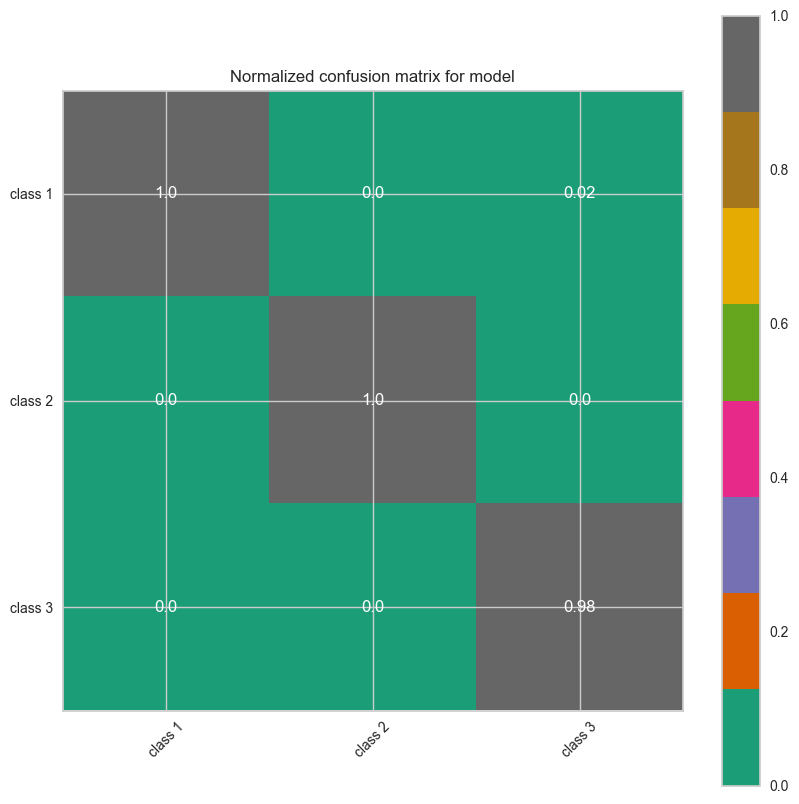

In [32]:
confusion_matrix_plot(cm_knn)

In [33]:
print("Classification Report:\n", classification_report(y_test, ypred1 , zero_division=1))

Classification Report:
               precision    recall  f1-score   support

        أحمر       1.00      0.97      0.99       209
        أخضر       1.00      1.00      1.00       187
     برتقالي       0.98      1.00      0.99       354

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750



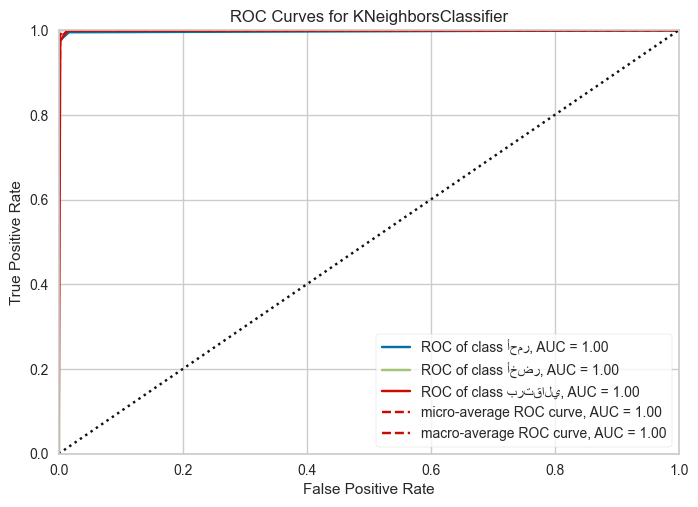

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={'أحمر': 'أحمر', 'أخضر': 'أخضر', 'برتقالي': 'برتقالي'},
       estimator=KNeighborsClassifier(metric='euclidean', n_neighbors=10))

In [34]:
plot_ROC_curve(knn2, x_train, y_train, x_test, y_test)

In [35]:
knn_score = table_score(ypred1)
knn_score.insert(0, 'Model', 'KNN')
knn_score


,Model,Recall,Precision,F1 Score,Accuracy
0,KNN,0.990431,0.994444,0.992345,0.992


### logistic regresion model

In [36]:
lr = LogisticRegression(multi_class="ovr")
lr.fit(x_train, y_train)
print("Test score: {:.2f}".format(lr.score(x_test , y_test)))

Test score: 1.00


In [37]:
param_grid_lr = { 
    'multi_class': ['auto' , 'ovr'] ,
    'solver': ['lbfgs' , 'liblinear'], 
    'C': [1, 2 , 4]
}
clf_lr = GridSearchCV(estimator= LogisticRegression() , param_grid= param_grid_lr , cv=kfold, scoring='accuracy', verbose=3)
clf_lr.fit(x_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END C=1, multi_class=auto, solver=lbfgs;, score=1.000 total time=   0.0s
[CV 2/10] END C=1, multi_class=auto, solver=lbfgs;, score=0.983 total time=   0.0s
[CV 3/10] END C=1, multi_class=auto, solver=lbfgs;, score=1.000 total time=   0.0s
[CV 4/10] END C=1, multi_class=auto, solver=lbfgs;, score=0.994 total time=   0.0s
[CV 5/10] END C=1, multi_class=auto, solver=lbfgs;, score=1.000 total time=   0.0s
[CV 6/10] END C=1, multi_class=auto, solver=lbfgs;, score=0.994 total time=   0.0s
[CV 7/10] END C=1, multi_class=auto, solver=lbfgs;, score=1.000 total time=   0.0s
[CV 8/10] END C=1, multi_class=auto, solver=lbfgs;, score=1.000 total time=   0.0s
[CV 9/10] END C=1, multi_class=auto, solver=lbfgs;, score=1.000 total time=   0.0s
[CV 10/10] END C=1, multi_class=auto, solver=lbfgs;, score=0.994 total time=   0.0s
[CV 1/10] END C=1, multi_class=auto, solver=liblinear;, score=0.994 total time=   0.0s
[CV 2/10] END C=1, 

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 4], 'multi_class': ['auto', 'ovr'],
                         'solver': ['lbfgs', 'liblinear']},
             scoring='accuracy', verbose=3)

In [38]:
print("Best of Hyper Parameter :" , clf_lr.best_params_, "\nScore : " , clf_lr.best_score_)

Best of Hyper Parameter : {'C': 2, 'multi_class': 'auto', 'solver': 'lbfgs'} 
Score :  0.9977142857142857


In [39]:
lr2 = clf_lr.best_estimator_.fit(x_train,y_train)
print("Test score for test_data: {:.2f}".format(lr2.score(x_test, y_test)))
print("Test score for train_data: {:.2f}".format(lr2.score(x_train, y_train)))

Test score for test_data: 1.00
Test score for train_data: 1.00


In [40]:
scores_clf2 = cross_val_score(lr2, x_train, y_train, cv=kfold, scoring='accuracy')
print(scores_clf2)
print("Mean for k_fold cross validation for Logistic Regression model", np.mean(scores_clf2))

[1.         0.98857143 1.         1.         1.         0.99428571
 1.         1.         1.         0.99428571]
Mean for k_fold cross validation for Logistic Regression model 0.9977142857142857


In [41]:
ypred2 = lr2.predict(x_test)
cm_lr = confusion_matrix(y_test, ypred2)
print("confusion_matrix(ytest, ypred): \n", cm_lr)

confusion_matrix(ytest, ypred): 
 [[209   0   0]
 [  0 187   0]
 [  0   0 354]]


In [42]:
sensitivity_specificity(cm_lr)

Sensitivity for each class: [1.0, 1.0, 1.0]
Specificity for each class: [1.0, 1.0, 1.0]
Sensitivity for each class:  0  is 1.0
Specificity for each class: 0  is 1.0
Sensitivity for each class:  1  is 1.0
Specificity for each class: 1  is 1.0
Sensitivity for each class:  2  is 1.0
Specificity for each class: 2  is 1.0


In [43]:
print("Classification Report:\n", classification_report(y_test, ypred2 , zero_division=1))

Classification Report:
               precision    recall  f1-score   support

        أحمر       1.00      1.00      1.00       209
        أخضر       1.00      1.00      1.00       187
     برتقالي       1.00      1.00      1.00       354

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



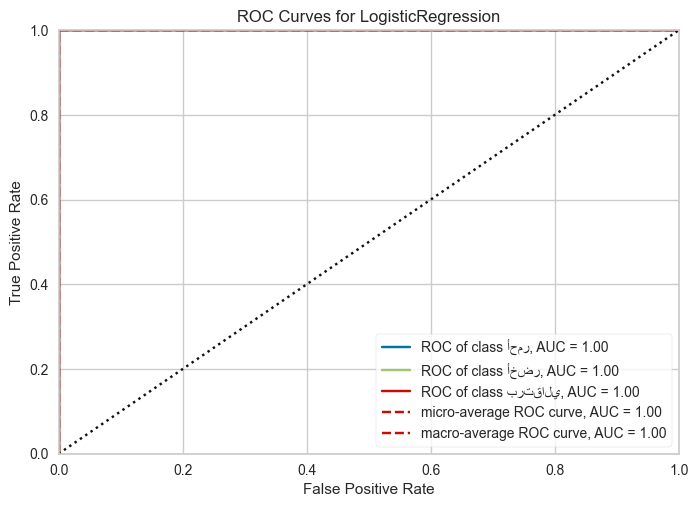

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={'أحمر': 'أحمر', 'أخضر': 'أخضر', 'برتقالي': 'برتقالي'},
       estimator=LogisticRegression(C=2))

In [44]:
plot_ROC_curve(lr2, x_train, y_train, x_test, y_test)

In [45]:
lr_score = table_score(ypred2)
lr_score.insert(0, 'Model', 'LR')
lr_score

,Model,Recall,Precision,F1 Score,Accuracy
0,LR,1.0,1.0,1.0,1.0


### SVM model

In [46]:
svm = SVC(decision_function_shape='ovo')
svm.fit(x_train , y_train)
print("Test score: {:.2f}".format(svm.score(x_test , y_test)))

Test score: 0.99


In [47]:
param_grid_svm = { 
    'decision_function_shape': ['ovo' , 'ovr'],
    'kernel': ['rbf' , 'poly'], 
    'C': [1, 2 , 4 , 6]
}
clf_svm = GridSearchCV(estimator= SVC() , param_grid= param_grid_svm , cv=kfold, scoring='accuracy', verbose=3)
clf_svm.fit(x_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10] END C=1, decision_function_shape=ovo, kernel=rbf;, score=0.994 total time=   0.0s
[CV 2/10] END C=1, decision_function_shape=ovo, kernel=rbf;, score=0.977 total time=   0.0s
[CV 3/10] END C=1, decision_function_shape=ovo, kernel=rbf;, score=0.994 total time=   0.0s
[CV 4/10] END C=1, decision_function_shape=ovo, kernel=rbf;, score=0.994 total time=   0.0s
[CV 5/10] END C=1, decision_function_shape=ovo, kernel=rbf;, score=1.000 total time=   0.0s
[CV 6/10] END C=1, decision_function_shape=ovo, kernel=rbf;, score=0.989 total time=   0.0s
[CV 7/10] END C=1, decision_function_shape=ovo, kernel=rbf;, score=0.989 total time=   0.0s
[CV 8/10] END C=1, decision_function_shape=ovo, kernel=rbf;, score=0.994 total time=   0.0s
[CV 9/10] END C=1, decision_function_shape=ovo, kernel=rbf;, score=0.994 total time=   0.0s
[CV 10/10] END C=1, decision_function_shape=ovo, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/10] END C=

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [1, 2, 4, 6],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=3)

In [48]:
print("Best of Hyper Parameter :" , clf_svm.best_params_, "\nScore : " , clf_svm.best_score_)

Best of Hyper Parameter : {'C': 1, 'decision_function_shape': 'ovo', 'kernel': 'poly'} 
Score :  0.9960000000000001


In [49]:
svm2 = clf_svm.best_estimator_.fit(x_train,y_train)
print("Test score for test_data: {:.2f}".format(svm2.score(x_test, y_test)))
print("Test score for train_data: {:.2f}".format(svm2.score(x_train, y_train)))

Test score for test_data: 1.00
Test score for train_data: 1.00


In [50]:
scores_clf3 = cross_val_score(svm2, x_train, y_train, cv=kfold, scoring='accuracy')
print(scores_clf3)
print("Mean for k_fold cross validation for SVM model", np.mean(scores_clf3))

[1.         0.98857143 0.99428571 1.         0.99428571 0.98857143
 1.         1.         1.         0.99428571]
Mean for k_fold cross validation for SVM model 0.9960000000000001


In [51]:
ypred3 = svm2.predict(x_test)
cm_svm = confusion_matrix(y_test, ypred3)
print("confusion_matrix(ytest, ypred): \n", cm_svm)

confusion_matrix(ytest, ypred): 
 [[209   0   0]
 [  0 187   0]
 [  0   0 354]]


In [52]:
sensitivity_specificity(cm_svm)

Sensitivity for each class: [1.0, 1.0, 1.0]
Specificity for each class: [1.0, 1.0, 1.0]
Sensitivity for each class:  0  is 1.0
Specificity for each class: 0  is 1.0
Sensitivity for each class:  1  is 1.0
Specificity for each class: 1  is 1.0
Sensitivity for each class:  2  is 1.0
Specificity for each class: 2  is 1.0


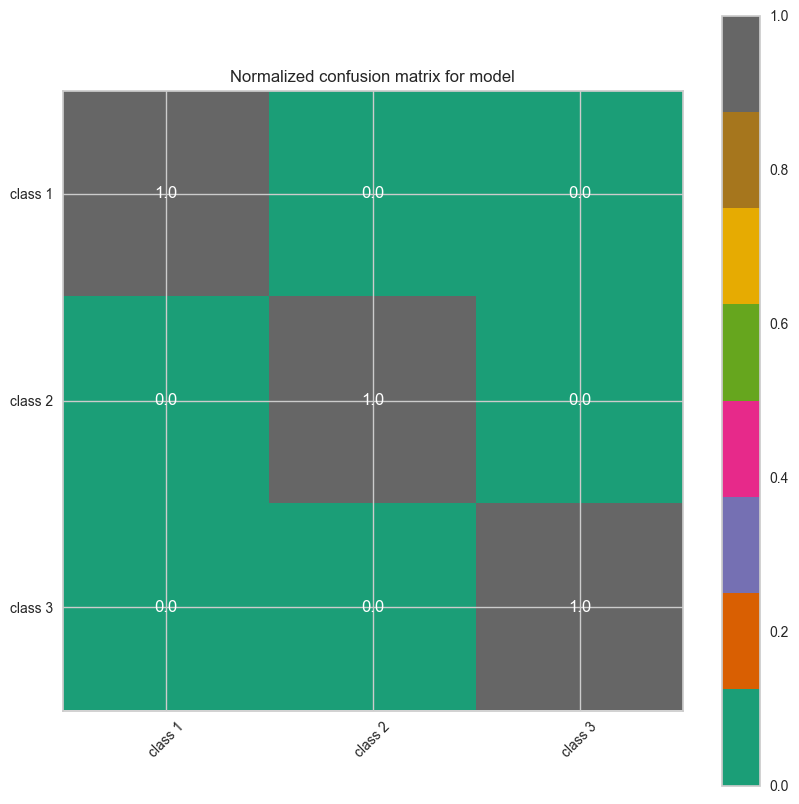

In [53]:
confusion_matrix_plot(cm_svm)

In [54]:
print("Classification Report:\n", classification_report(y_test, ypred3 , zero_division=1))

Classification Report:
               precision    recall  f1-score   support

        أحمر       1.00      1.00      1.00       209
        أخضر       1.00      1.00      1.00       187
     برتقالي       1.00      1.00      1.00       354

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



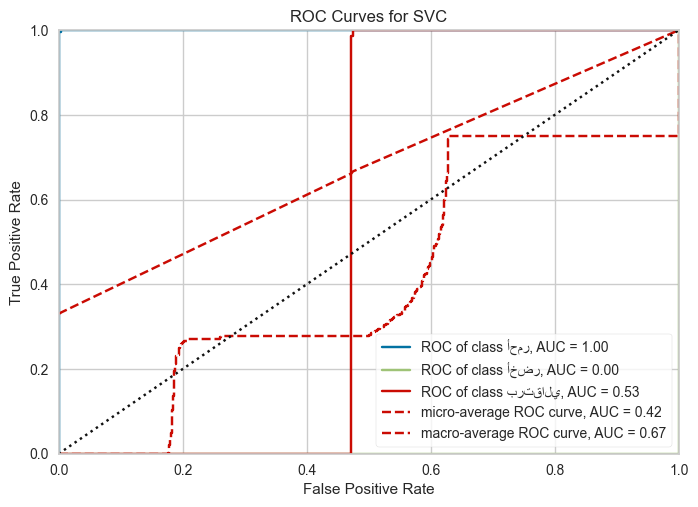

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={'أحمر': 'أحمر', 'أخضر': 'أخضر', 'برتقالي': 'برتقالي'},
       estimator=SVC(C=1, decision_function_shape='ovo', kernel='poly'))

In [55]:
plot_ROC_curve(svm2, x_train, y_train, x_test, y_test)
# print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

In [56]:
svm_score = table_score(ypred3)
svm_score.insert(0, 'Model', 'SVM')
svm_score

,Model,Recall,Precision,F1 Score,Accuracy
0,SVM,1.0,1.0,1.0,1.0


### Random forest model

In [57]:
RF = RandomForestClassifier(criterion = 'gini',n_estimators=100,max_depth=2) #criterion can be also : entropy 
RF.fit(x_train, y_train)
print("Test score: {:.2f}".format(RF.score(x_test , y_test)))

Test score: 0.99


In [58]:
param_grid_RF = { 
    'criterion': ['gini' , 'entropy'],
    'n_estimators': [100, 200, 300],
    'max_depth': [2 , 4 , 8]
}
clf_RF = GridSearchCV(estimator= RandomForestClassifier() , param_grid= param_grid_RF , cv=kfold, scoring='accuracy', verbose=3)
clf_RF.fit(x_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV 1/10] END criterion=gini, max_depth=2, n_estimators=100;, score=0.994 total time=   0.1s
[CV 2/10] END criterion=gini, max_depth=2, n_estimators=100;, score=0.977 total time=   0.2s
[CV 3/10] END criterion=gini, max_depth=2, n_estimators=100;, score=0.994 total time=   0.2s
[CV 4/10] END criterion=gini, max_depth=2, n_estimators=100;, score=0.994 total time=   0.2s
[CV 5/10] END criterion=gini, max_depth=2, n_estimators=100;, score=1.000 total time=   0.1s
[CV 6/10] END criterion=gini, max_depth=2, n_estimators=100;, score=0.989 total time=   0.1s
[CV 7/10] END criterion=gini, max_depth=2, n_estimators=100;, score=0.994 total time=   0.1s
[CV 8/10] END criterion=gini, max_depth=2, n_estimators=100;, score=0.989 total time=   0.1s
[CV 9/10] END criterion=gini, max_depth=2, n_estimators=100;, score=0.994 total time=   0.2s
[CV 10/10] END criterion=gini, max_depth=2, n_estimators=100;, score=1.000 total time=   0.1s
[CV 1/

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 8],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=3)

In [59]:
print("Best of Hyper Parameter :" , clf_RF.best_params_, "\nScore : " , clf_RF.best_score_)

Best of Hyper Parameter : {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 200} 
Score :  0.9937142857142858


In [60]:
RF2 = clf_RF.best_estimator_.fit(x_train,y_train)
print("Test score for test_data: {:.2f}".format(RF2.score(x_test, y_test)))
print("Test score for train_data: {:.2f}".format(RF2.score(x_train, y_train)))

Test score for test_data: 0.99
Test score for train_data: 1.00


In [61]:
scores_clf4 = cross_val_score(RF2, x_train, y_train, cv=kfold, scoring='accuracy')
print(scores_clf4)
print("Mean for k_fold cross validation for Random Forest model", np.mean(scores_clf4))

[0.99428571 0.97714286 0.99428571 0.99428571 1.         0.98857143
 0.98857143 0.99428571 0.99428571 1.        ]
Mean for k_fold cross validation for Random Forest model 0.9925714285714285


In [62]:
ypred4 = RF2.predict(x_test)
cm_rf = confusion_matrix(y_test, ypred4)
print("confusion_matrix(ytest, ypred): \n", cm_rf)

confusion_matrix(ytest, ypred): 
 [[204   0   5]
 [  0 187   0]
 [  0   0 354]]


In [63]:
sensitivity_specificity(cm_rf)

Sensitivity for each class: [0.9760765550239234, 1.0, 1.0]
Specificity for each class: [1.0, 1.0, 0.9873737373737373]
Sensitivity for each class:  0  is 0.9760765550239234
Specificity for each class: 0  is 1.0
Sensitivity for each class:  1  is 1.0
Specificity for each class: 1  is 1.0
Sensitivity for each class:  2  is 1.0
Specificity for each class: 2  is 0.9873737373737373


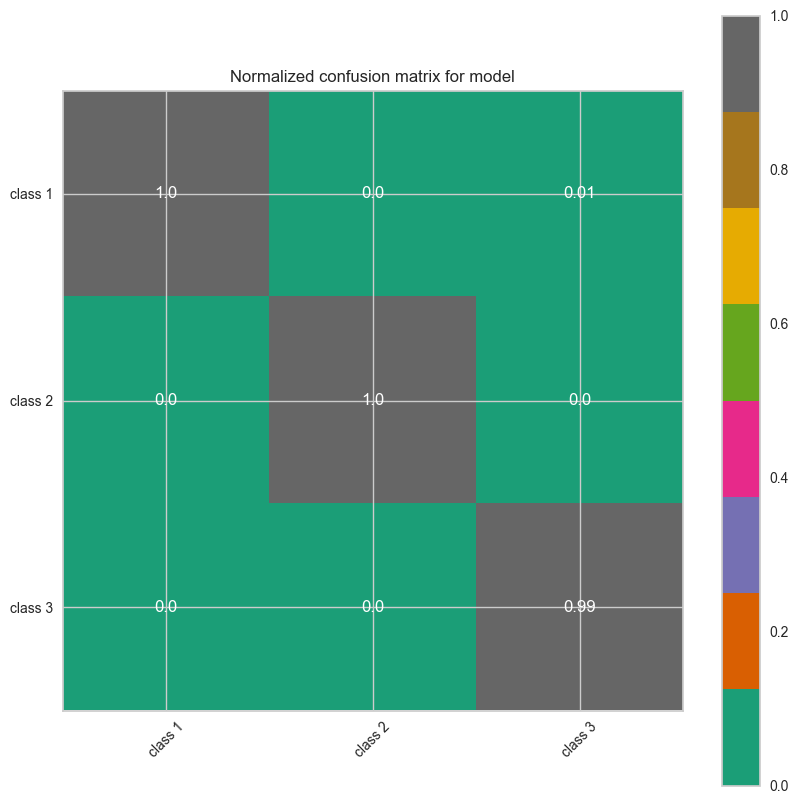

In [64]:
confusion_matrix_plot(cm_rf)

In [65]:
print("Classification Report:\n", classification_report(y_test, ypred4, zero_division=1))

Classification Report:
               precision    recall  f1-score   support

        أحمر       1.00      0.98      0.99       209
        أخضر       1.00      1.00      1.00       187
     برتقالي       0.99      1.00      0.99       354

    accuracy                           0.99       750
   macro avg       1.00      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750



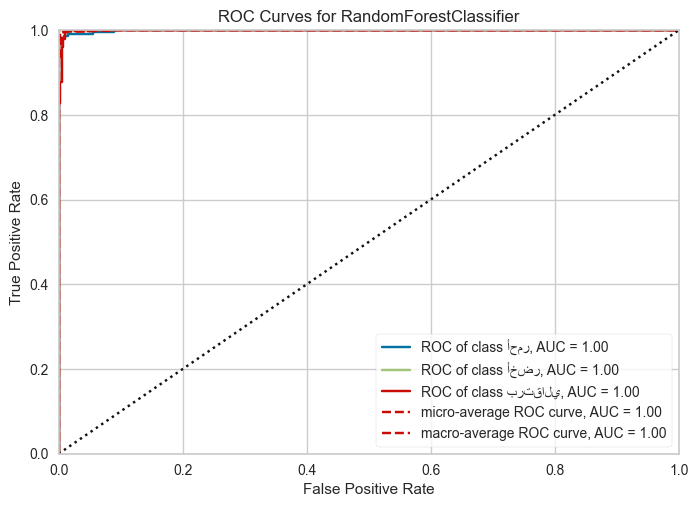

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={'أحمر': 'أحمر', 'أخضر': 'أخضر', 'برتقالي': 'برتقالي'},
       estimator=RandomForestClassifier(max_depth=8, n_estimators=200))

In [66]:
plot_ROC_curve(RF2, x_train, y_train, x_test, y_test)

In [67]:
rf_score = table_score(ypred4)
rf_score.insert(0, 'Model', 'RF')
rf_score

,Model,Recall,Precision,F1 Score,Accuracy
0,RF,0.992026,0.995357,0.993627,0.993333


### Naive Bayes

In [68]:
NB = GaussianNB()
NB.fit(x_train, y_train)
print("Test score: {:.2f}".format(NB.score(x_test , y_test)))

Test score: 0.99


In [69]:
param_grid_NB = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
}
clf_NB = GridSearchCV(estimator= GaussianNB() , param_grid= param_grid_NB , cv=kfold, scoring='accuracy', verbose=3)
clf_NB.fit(x_train, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END ..............var_smoothing=1e-09;, score=0.994 total time=   0.0s
[CV 2/10] END ..............var_smoothing=1e-09;, score=0.977 total time=   0.0s
[CV 3/10] END ..............var_smoothing=1e-09;, score=0.994 total time=   0.0s
[CV 4/10] END ..............var_smoothing=1e-09;, score=0.994 total time=   0.0s
[CV 5/10] END ..............var_smoothing=1e-09;, score=1.000 total time=   0.0s
[CV 6/10] END ..............var_smoothing=1e-09;, score=0.989 total time=   0.0s
[CV 7/10] END ..............var_smoothing=1e-09;, score=0.989 total time=   0.0s
[CV 8/10] END ..............var_smoothing=1e-09;, score=0.994 total time=   0.0s
[CV 9/10] END ..............var_smoothing=1e-09;, score=0.994 total time=   0.0s
[CV 10/10] END .............var_smoothing=1e-09;, score=1.000 total time=   0.0s
[CV 1/10] END ..............var_smoothing=1e-08;, score=0.994 total time=   0.0s
[CV 2/10] END ..............var_smoothing=1e-08;

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': [1e-09, 1e-08, 1e-07, 1e-06, 1e-05,
                                           0.0001, 0.001, 0.01, 0.1]},
             scoring='accuracy', verbose=3)

In [70]:
print("Best of Hyper Parameter :" , clf_NB.best_params_, "\nScore : " , clf_NB.best_score_)

Best of Hyper Parameter : {'var_smoothing': 1e-09} 
Score :  0.9925714285714285


In [71]:
NB2 = clf_NB.best_estimator_.fit(x_train,y_train)
print("Test score for test_data: {:.2f}".format(NB2.score(x_test, y_test)))
print("Test score for train_data: {:.2f}".format(NB2.score(x_train, y_train)))

Test score for test_data: 0.99
Test score for train_data: 0.99


In [72]:
scores_clf5 = cross_val_score(NB2, x_train, y_train, cv=kfold, scoring='accuracy')
print(scores_clf5)
print("Mean for k_fold cross validation for Naive Bayes model", np.mean(scores_clf5))

[0.99428571 0.97714286 0.99428571 0.99428571 1.         0.98857143
 0.98857143 0.99428571 0.99428571 1.        ]
Mean for k_fold cross validation for Naive Bayes model 0.9925714285714285


In [73]:
ypred5 = NB2.predict(x_test)
cm_NB = confusion_matrix(y_test, ypred5)
print("confusion_matrix(ytest, ypred): \n", cm_NB)

confusion_matrix(ytest, ypred): 
 [[203   0   6]
 [  0 187   0]
 [  0   0 354]]


In [74]:
sensitivity_specificity(cm_NB)

Sensitivity for each class: [0.9712918660287081, 1.0, 1.0]
Specificity for each class: [1.0, 1.0, 0.9848484848484849]
Sensitivity for each class:  0  is 0.9712918660287081
Specificity for each class: 0  is 1.0
Sensitivity for each class:  1  is 1.0
Specificity for each class: 1  is 1.0
Sensitivity for each class:  2  is 1.0
Specificity for each class: 2  is 0.9848484848484849


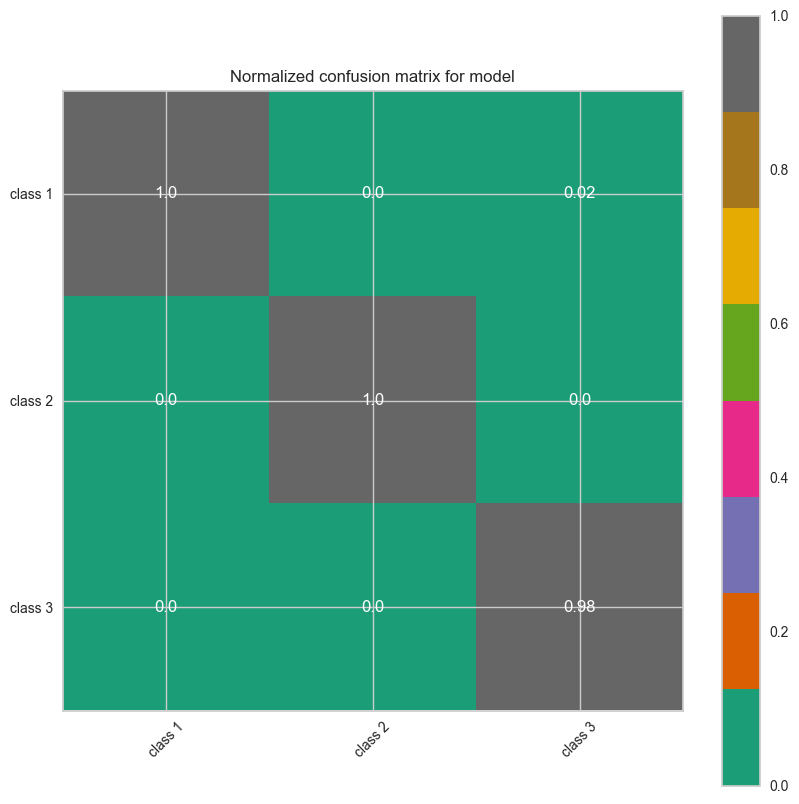

In [75]:
confusion_matrix_plot(cm_NB)

In [76]:
print("Classification Report:\n", classification_report(y_test, ypred5, zero_division=1))

Classification Report:
               precision    recall  f1-score   support

        أحمر       1.00      0.97      0.99       209
        أخضر       1.00      1.00      1.00       187
     برتقالي       0.98      1.00      0.99       354

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750



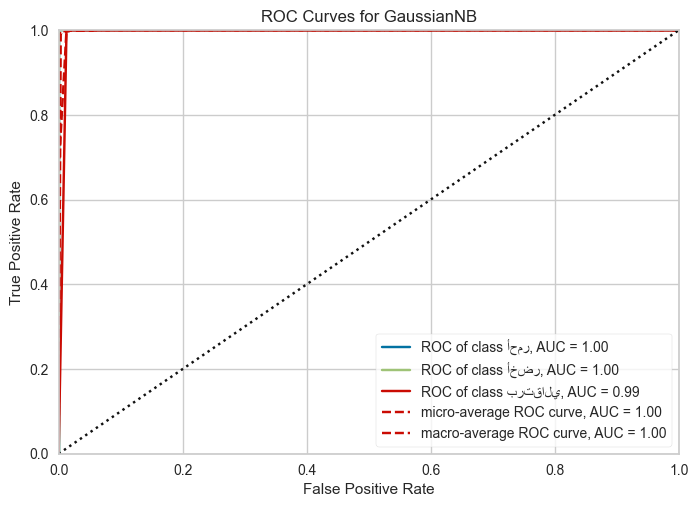

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for GaussianNB'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={'أحمر': 'أحمر', 'أخضر': 'أخضر', 'برتقالي': 'برتقالي'},
       estimator=GaussianNB())

In [77]:
plot_ROC_curve(NB2, x_train, y_train, x_test, y_test)

In [78]:
nb_score = table_score(ypred5)
nb_score.insert(0, 'Model', 'NB')
nb_score

,Model,Recall,Precision,F1 Score,Accuracy
0,NB,0.990431,0.994444,0.992345,0.992


### NN model

In [79]:
MLP = MLPClassifier(activation='tanh',solver='sgd', hidden_layer_sizes=(5,), max_iter=5000, random_state=1)
MLP.fit(x_train,y_train)
print("Test score: {:.2f}".format(MLP.score(x_test, y_test)))

Test score: 0.47


In [80]:
param_grid_MLP = {
    'learning_rate_init': [0.001 , 0.01], 
    'batch_size': [1]
    # 'hidden_layer_sizes': [(20,), (50, 50)],
    # 'activation': ['relu', 'tanh'],
    # 'alpha': [0.0001, 0.01],
}
clf_MLP = GridSearchCV(estimator=MLPClassifier(), param_grid= param_grid_MLP , cv=kfold, scoring='accuracy' , verbose=3)
clf_MLP.fit(x_train, y_train)

Fitting 10 folds for each of 2 candidates, totalling 20 fits
[CV 1/10] END batch_size=1, learning_rate_init=0.001;, score=0.994 total time= 1.0min
[CV 2/10] END batch_size=1, learning_rate_init=0.001;, score=0.977 total time=  43.7s
[CV 3/10] END batch_size=1, learning_rate_init=0.001;, score=0.989 total time=  30.8s
[CV 4/10] END batch_size=1, learning_rate_init=0.001;, score=0.994 total time=  22.9s
[CV 5/10] END batch_size=1, learning_rate_init=0.001;, score=1.000 total time=  50.3s
[CV 6/10] END batch_size=1, learning_rate_init=0.001;, score=0.989 total time=  46.7s
[CV 7/10] END batch_size=1, learning_rate_init=0.001;, score=1.000 total time=  35.9s
[CV 8/10] END batch_size=1, learning_rate_init=0.001;, score=0.994 total time=  24.6s
[CV 9/10] END batch_size=1, learning_rate_init=0.001;, score=0.994 total time=  38.1s
[CV 10/10] END batch_size=1, learning_rate_init=0.001;, score=0.954 total time=  19.7s
[CV 1/10] END batch_size=1, learning_rate_init=0.01;, score=0.994 total time= 

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=MLPClassifier(),
             param_grid={'batch_size': [1],
                         'learning_rate_init': [0.001, 0.01]},
             scoring='accuracy', verbose=3)

In [81]:
print("Best of Hyper Parameter :" , clf_MLP.best_params_, "\nScore : " , clf_MLP.best_score_)

Best of Hyper Parameter : {'batch_size': 1, 'learning_rate_init': 0.001} 
Score :  0.9885714285714287


In [82]:
MLP2 = clf_MLP.best_estimator_.fit(x_train,y_train)
print("Test score for test_data: {:.2f}".format(MLP2.score(x_test, y_test)))
print("Test score for train_data: {:.2f}".format(MLP2.score(x_train, y_train)))

Test score for test_data: 0.99
Test score for train_data: 0.99


In [83]:
scores_clf6 = cross_val_score(MLP2, x_train, y_train, cv=kfold, scoring='accuracy')
print(scores_clf6)
print("Mean for k_fold cross validation for Neural Network model", np.mean(scores_clf6))

[0.98857143 0.97714286 0.99428571 0.99428571 0.98857143 0.98857143
 0.99428571 0.99428571 0.99428571 0.98285714]
Mean for k_fold cross validation for Neural Network model 0.9897142857142857


In [84]:
ypred6 = MLP2.predict(x_test)
cm_MLP = confusion_matrix(y_test, ypred6)
print("confusion_matrix(ytest, ypred): \n", cm_MLP)

confusion_matrix(ytest, ypred): 
 [[205   0   4]
 [  0 187   0]
 [  1   0 353]]


In [85]:
sensitivity_specificity(cm_MLP)

Sensitivity for each class: [0.9808612440191388, 1.0, 0.9971751412429378]
Specificity for each class: [0.9981515711645101, 1.0, 0.98989898989899]
Sensitivity for each class:  0  is 0.9808612440191388
Specificity for each class: 0  is 0.9981515711645101
Sensitivity for each class:  1  is 1.0
Specificity for each class: 1  is 1.0
Sensitivity for each class:  2  is 0.9971751412429378
Specificity for each class: 2  is 0.98989898989899


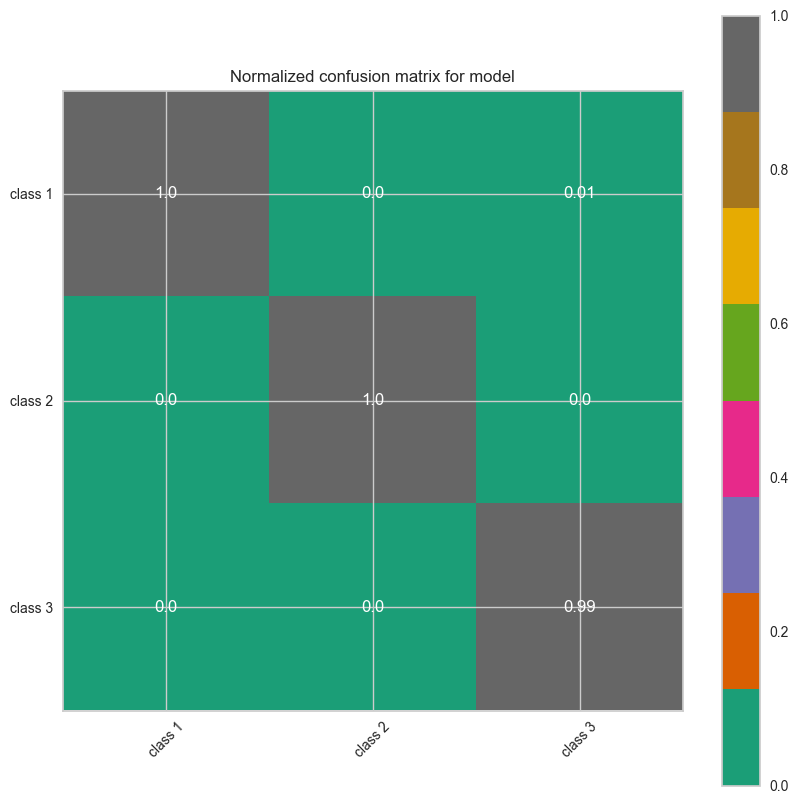

In [86]:
confusion_matrix_plot(cm_MLP)

In [87]:
print("Classification Report:\n", classification_report(y_test, ypred6, zero_division=1))

Classification Report:
               precision    recall  f1-score   support

        أحمر       1.00      0.98      0.99       209
        أخضر       1.00      1.00      1.00       187
     برتقالي       0.99      1.00      0.99       354

    accuracy                           0.99       750
   macro avg       0.99      0.99      0.99       750
weighted avg       0.99      0.99      0.99       750



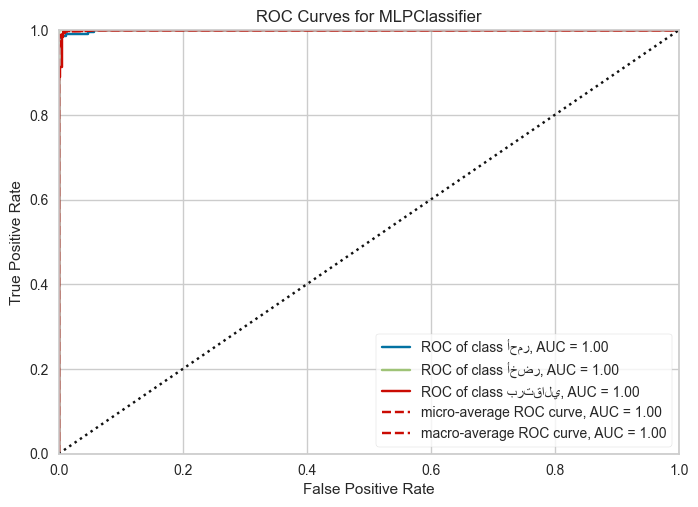

ROCAUC(ax=<AxesSubplot:title={'center':'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       encoder={'أحمر': 'أحمر', 'أخضر': 'أخضر', 'برتقالي': 'برتقالي'},
       estimator=MLPClassifier(batch_size=1))

In [88]:
plot_ROC_curve(MLP2, x_train, y_train, x_test, y_test)

In [89]:
nn_score = table_score(ypred6)
nn_score.insert(0, 'Model', 'NN')
nn_score

,Model,Recall,Precision,F1 Score,Accuracy
0,NN,0.992679,0.994647,0.99364,0.993333


### comparison

In [90]:
predictions = pd.concat([knn_score, lr_score, svm_score, rf_score, nb_score, nn_score], ignore_index=True, sort=False)
predictions.sort_values(by=['Accuracy'], ascending=False)

,Model,Recall,Precision,F1 Score,Accuracy
1,LR,1.000000,1.000000,1.000000,1.000000
2,SVM,1.000000,1.000000,1.000000,1.000000
3,RF,0.992026,0.995357,0.993627,0.993333
5,NN,0.992679,0.994647,0.993640,0.993333
0,KNN,0.990431,0.994444,0.992345,0.992000
4,NB,0.990431,0.994444,0.992345,0.992000


### visualization

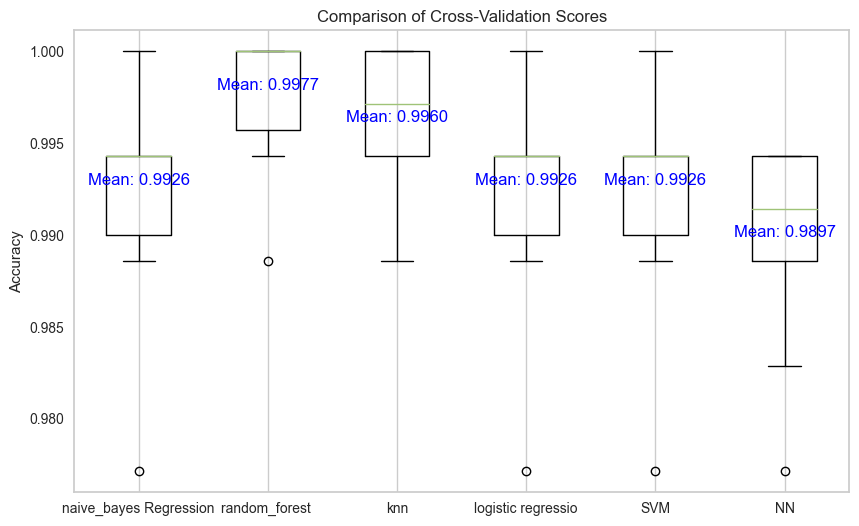

In [91]:
labels = ['naive_bayes Regression', 'random_forest ','knn','logistic regressio','SVM','NN']
data = [scores_clf1, scores_clf2,scores_clf3,scores_clf4,scores_clf5,scores_clf6]

plt.figure(figsize=(10, 6))
plt.boxplot(data)
plt.title('Comparison of Cross-Validation Scores')
plt.ylabel('Accuracy')
plt.xticks(np.arange(1, 7), labels)
plt.grid(axis='y')

# Calculate and display mean scores
mean_scores = [np.mean(scores_clf1), np.mean(scores_clf2),np.mean(scores_clf3),np.mean(scores_clf4),np.mean(scores_clf5),np.mean(scores_clf6)]
for i, mean in enumerate(mean_scores, 1):
    plt.text(i, mean, f'Mean: {mean:.4f}', ha='center', va='bottom', color='blue')

plt.show()

### :
x_pred = pd.read_excel("data_for_test_model_by_dr_yasser.xlsx")
for i in x_pred.columns:
    x_pred[i] = x_pred[i].apply(eval)

mean_values_per_feature_x_pred = x_pred.apply(lambda row: [np.mean(row[i]) for i in x_pred.columns], axis=1)

x_pred = pd.DataFrame(mean_values_per_feature_x_pred.tolist(), columns=x_pred.columns,index=x_pred.index)
x_pred['متوسط'] = x_pred.apply(lambda row: np.mean(row), axis=1)

print("Original DataFrame:")
print(x_pred)# ***********************************
x_pred=x_pred.iloc[0,:]
ypred1 = knn2.predict(x_pred) 
print(ypred1)
ypred2 = lr2.predict(x_pred)
print(ypred2)
ypred3 = svm2.predict(x_pred)
print(ypred3)
ypred4 = RF2.predict(x_pred)
print(ypred4)
ypred5 = NB2.predict(x_pred)
print(ypred5)
ypred6 = MLP2.predict(x_pred)
print(ypred6)



In [92]:
pred_scale = pd.read_excel("data_for_test_model_by_dr_yasser.xlsx") 
for i in pred_scale.columns:
    pred_scale[i] = pred_scale[i].apply(eval)
pred_scale

,مرجعية,تحليل,تصميم,برمجة,اختبار,نتائج,تقرير,عرض,غيتهاب
0,"[99, 100, 100, 100, 30]","[100, 100, 80, 70, 80]","[30, 10, 0, 70, 100]","[41, 23, 32, 3, 80]","[0, 0, 0, 0, 90]","[0, 0, 0, 0, 0]","[50, 20, 50, 50, 70]","[50, 20, 50, 50, 70]","[0, 0, 0, 80, 100]"
1,"[80, 100, 100, 100, 100]","[100, 100, 80, 70, 80]","[22, 20, 50, 70, 100]","[31, 31, 33, 10, 100]","[0, 0, 0, 0, 0]","[0, 0, 0, 0, 0]","[50, 20, 50, 50, 70]","[50, 20, 50, 50, 70]","[0, 0, 0, 20, 100]"
2,"[100, 100, 40, 100, 100]","[100, 100, 80, 70, 80]","[11, 33, 44, 70, 100]","[0, 0, 0, 0, 80]","[0, 0, 0, 0, 90]","[0, 0, 0, 0, 0]","[50, 20, 50, 50, 70]","[50, 20, 50, 50, 70]","[0, 0, 0, 80, 100]"
3,"[99, 88, 80, 60, 80]","[100, 100, 80, 70, 73]","[88, 90, 80, 70, 80]","[77, 90, 70, 84, 70]","[88, 70, 70, 100, 90]","[99, 88, 80, 60, 80]","[99, 75, 75, 70, 70]","[99, 70, 80, 70, 70]","[77, 90, 70, 84, 70]"
4,"[100, 100, 80, 70, 73]","[100, 100, 80, 70, 80]","[88, 67, 79, 70, 80]","[72, 78, 70, 90, 70]","[88, 75, 70, 60, 85]","[70, 80, 90, 90, 70]","[60, 80, 76, 92, 82]","[99, 75, 75, 70, 70]","[77, 90, 70, 84, 70]"
5,"[71, 91, 81, 83, 69]","[100, 100, 80, 70, 80]","[99, 88, 80, 60, 80]","[100, 100, 80, 70, 73]","[71, 91, 81, 83, 69]","[99, 88, 80, 60, 80]","[99, 75, 75, 70, 70]","[50, 20, 50, 50, 70]","[77, 90, 70, 84, 70]"
6,"[100, 100, 80, 70, 73]","[100, 100, 80, 70, 80]","[82, 77, 81, 70, 100]","[71, 91, 81, 83, 69]","[88, 90, 80, 70, 80]","[66, 77, 90, 73, 50]","[50, 20, 50, 50, 70]","[50, 20, 50, 50, 70]","[0, 0, 0, 20, 100]"
7,"[88, 67, 79, 70, 80]","[100, 100, 80, 70, 80]","[77, 79, 99, 70, 100]","[70, 70, 80, 80, 80]","[71, 91, 81, 83, 69]","[81, 74, 85, 74, 90]","[60, 70, 80, 80, 70]","[71, 91, 81, 83, 69]","[0, 0, 0, 20, 100]"
8,"[60, 90, 87, 40, 100]","[15, 16, 80, 70, 80]","[88, 90, 80, 70, 100]","[60, 70, 80, 90, 80]","[71, 91, 81, 83, 69]","[88, 90, 80, 70, 80]","[77, 88, 76, 74, 70]","[50, 20, 50, 50, 70]","[0, 0, 0, 20, 100]"
9,"[63, 65, 57, 52, 57]","[50, 50, 53, 57, 57]","[66, 61, 53, 70, 55]","[60, 40, 30, 90, 80]","[0, 0, 0, 0, 0]","[77, 50, 50, 84, 40]","[50, 40, 50, 50, 70]","[50, 20, 50, 50, 70]","[0, 0, 0, 20, 100]"


In [93]:
for row_index in range(len(pred_scale)):
    for col_index in range(len(pred_scale.columns)):
        value = pred_scale.iloc[row_index, col_index]
        weights = [0.01 * i for i in range(1,len(value)+1)]
        result = [x * y for x, y in zip(value, weights)]
        sum_weight = 0
        for i in range(len(weights)):
            if value[i] != 0:
                sum_weight += weights[i]
        if sum_weight != 0:
            pred_scale.iloc[row_index, col_index] = np.ceil(sum(result)/sum_weight)
        else:
            pred_scale.iloc[row_index, col_index] = 0
pred_scale

,مرجعية,تحليل,تصميم,برمجة,اختبار,نتائج,تقرير,عرض,غيتهاب
0,77.0,82.0,70.0,40.0,90.0,0,53.0,53.0,92.0
1,99.0,82.0,67.0,49.0,0,0,53.0,53.0,65.0
2,88.0,82.0,66.0,80.0,90.0,0,53.0,53.0,92.0
3,77.0,79.0,80.0,77.0,86.0,77.0,74.0,74.0,77.0
4,79.0,82.0,76.0,77.0,75.0,81.0,82.0,74.0,77.0
5,79.0,82.0,77.0,79.0,79.0,77.0,74.0,53.0,77.0
6,79.0,82.0,84.0,79.0,80.0,69.0,53.0,53.0,65.0
7,76.0,82.0,88.0,78.0,79.0,82.0,74.0,79.0,65.0
8,78.0,65.0,86.0,80.0,79.0,80.0,76.0,53.0,65.0
9,58.0,55.0,61.0,66.0,0,58.0,56.0,53.0,65.0


In [94]:
########## calvulate متوسط
pred_scale["متوسط"]=0
weights = [0.5, 0.7, 0.8, 0.9, 0.3, 1, 0.4, 0.2, 0.2 ,0]

for i in range(len(pred_scale)):
    value = pred_scale.iloc[i].tolist()
    result = [x * y for x, y in zip(value, weights)]
    sum_weight = 0
    for j in range(len(weights)):
        if value[j] != 0:
            sum_weight += weights[j]
    if sum_weight != 0:
        pred_scale.loc[i,"متوسط"] = np.ceil(sum(result)/sum_weight)
    else:
        pred_scale.loc[i,"متوسط"] = 0

pred_scale.head()

,مرجعية,تحليل,تصميم,برمجة,اختبار,نتائج,تقرير,عرض,غيتهاب,متوسط
0,77.0,82.0,70.0,40.0,90.0,0,53.0,53.0,92.0,67
1,99.0,82.0,67.0,49.0,0,0,53.0,53.0,65.0,68
2,88.0,82.0,66.0,80.0,90.0,0,53.0,53.0,92.0,76
3,77.0,79.0,80.0,77.0,86.0,77.0,74.0,74.0,77.0,78
4,79.0,82.0,76.0,77.0,75.0,81.0,82.0,74.0,77.0,79


In [95]:
pred_scale = pred_scale.apply(lambda x: x.astype(int))
print(pred_scale.dtypes)

مرجعية    int32
تحليل     int32
تصميم     int32
برمجة     int32
اختبار    int32
نتائج     int32
تقرير     int32
عرض       int32
غيتهاب    int32
متوسط     int32
dtype: object


In [96]:
# ############# calculate تصنيف
pred_scale['تصنيف']=1

for i in range(pred_scale['تصنيف'].count()):
    if pred_scale.iloc[i,9]<50:
        pred_scale.iloc[i,10]="أحمر"
    elif (pred_scale.iloc[i,9] >=50) & (pred_scale.iloc[i,9]<70):
        pred_scale.iloc[i,10]="برتقالي"
    elif (pred_scale.iloc[i,9] >=70) :
        pred_scale.iloc[i,10]="أخضر"

pred_scale

,مرجعية,تحليل,تصميم,برمجة,اختبار,نتائج,تقرير,عرض,غيتهاب,متوسط,تصنيف
0,77,82,70,40,90,0,53,53,92,67,برتقالي
1,99,82,67,49,0,0,53,53,65,68,برتقالي
2,88,82,66,80,90,0,53,53,92,76,أخضر
3,77,79,80,77,86,77,74,74,77,78,أخضر
4,79,82,76,77,75,81,82,74,77,79,أخضر
5,79,82,77,79,79,77,74,53,77,78,أخضر
6,79,82,84,79,80,69,53,53,65,75,أخضر
7,76,82,88,78,79,82,74,79,65,81,أخضر
8,78,65,86,80,79,80,76,53,65,77,أخضر
9,58,55,61,66,0,58,56,53,65,60,برتقالي


In [97]:
x_pred_scale=pred_scale.drop(['تصنيف','متوسط'],axis=1)
y_pred_scale=pred_scale['تصنيف']
print(x_pred_scale)
print(y_pred_scale)

# **********************************************************************************************************
def table_score_2(ypred,y_pred_test=y_pred_scale):
    y_pred_test=y_pred_scale
    Recall = recall_score(y_pred_test, ypred, average='macro' , zero_division=1)
    Precision = precision_score(y_pred_test, ypred, average='macro' , zero_division=1)
    f1 = f1_score(y_pred_test, ypred, average='macro' , zero_division=1)
    accuracy = accuracy_score(y_pred_test, ypred)
    ndf = [(Recall, Precision, f1, accuracy)]

    score = pd.DataFrame(data=ndf, columns=['Recall', 'Precision', 'F1 Score', 'Accuracy'])
    return score
# *********************************** ******************************************************************

ypred_1_scale = knn2.predict(x_pred_scale) 
print("knn model") 
print("accuarcy",(accuracy_score(y_pred_scale, ypred_1_scale)))
print("score = ",knn2.score(x_pred_scale , y_pred_scale))
knn_score = table_score_2(ypred_1_scale)
knn_score.insert(0, 'Model', 'knn')
knn_score
ypred_2_scale = lr2.predict(x_pred_scale) 
print("ir model",ypred_2_scale) 
print("accuarcy",(accuracy_score(y_pred_scale, ypred_2_scale)))
print("score = ",lr2.score(x_pred_scale , y_pred_scale))
lr_score = table_score_2(ypred_2_scale)
lr_score.insert(0, 'Model', 'lr')
lr_score
ypred_3_scale = svm2.predict(x_pred_scale) 
print("svm model",ypred_3_scale) 
print("accuarcy",(accuracy_score(y_pred_scale, ypred_3_scale)))
print("score = ",svm2.score(x_pred_scale , y_pred_scale))
svm_score = table_score_2(ypred_3_scale)
svm_score.insert(0, 'Model', 'svm')
svm_score
ypred_4_scale = RF2.predict(x_pred_scale) 
print("rf2 model",ypred_4_scale) 
print("accuarcy",(accuracy_score(y_pred_scale, ypred_4_scale)))
print("score = ",RF2.score(x_pred_scale , y_pred_scale))
RF_score = table_score_2(ypred_4_scale)
RF_score.insert(0, 'Model', 'RF')
RF_score
ypred_5_scale = NB2.predict(x_pred_scale) 
print("NB model",ypred_5_scale) 
print("accuarcy",(accuracy_score(y_pred_scale, ypred_5_scale)))
print("score = ",NB2.score(x_pred_scale , y_pred_scale))
NB_score = table_score_2(ypred_5_scale)
NB_score.insert(0, 'Model', 'NB')
NB_score
ypred_6_scale = MLP2.predict(x_pred_scale) 
print("NN model",ypred_6_scale)
print("accuarcy",(accuracy_score(y_pred_scale, ypred_6_scale)))
print("score = ",MLP2.score(x_pred_scale , y_pred_scale))
NN_score = table_score_2(ypred_6_scale)
NN_score.insert(0, 'Model', 'NN')
NN_score
# comparising table
predictions_for_test = pd.concat([knn_score, lr_score, svm_score, RF_score, NB_score, NN_score], ignore_index=True, sort=False)
predictions_for_test.sort_values(by=['Accuracy'], ascending=False)

    مرجعية  تحليل  تصميم  برمجة  اختبار  نتائج  تقرير  عرض  غيتهاب
0       77     82     70     40      90      0     53   53      92
1       99     82     67     49       0      0     53   53      65
2       88     82     66     80      90      0     53   53      92
3       77     79     80     77      86     77     74   74      77
4       79     82     76     77      75     81     82   74      77
5       79     82     77     79      79     77     74   53      77
6       79     82     84     79      80     69     53   53      65
7       76     82     88     78      79     82     74   79      65
8       78     65     86     80      79     80     76   53      65
9       58     55     61     66       0     58     56   53      65
10      56     63     61     55      63     58     58   58      61
11      56     55     58     66      55     58     53   57      65
12      63     82     87     77       0      0     53   53      65
13      56     82     79     80       0     51     53   53    

,Model,Recall,Precision,F1 Score,Accuracy
3,RF,0.911111,0.911111,0.911111,0.882353
0,knn,0.900000,0.888889,0.874510,0.823529
5,NN,0.833333,0.848485,0.790850,0.705882
2,svm,0.777778,0.666667,0.652778,0.647059
4,NB,0.800000,0.833333,0.746032,0.647059
1,lr,0.766667,0.820513,0.697706,0.588235


## Save Model

In [37]:
import joblib

filename = 'model.joblib'
joblib.dump(knn2, filename)

['model.joblib']